# Ömer Faruk Güzel (omerfguzel@gmail.com)

In [1]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Loading Data
data = pd.read_csv("ACME-HappinessSurvey2020.csv")
data = pd.DataFrame(data)

In [3]:
# Checking for NaN or null values
data.isnull().values.any()

False

In [4]:
# Splitting data #1
X , y = data.drop(labels="Y",axis=1) , data["Y"]

In [5]:
# Splitting data #2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=169,stratify=y)

In [6]:
# Creating classifier, fitting classifier and evaluating classifier's performance
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_pred,y_test))

0.7692307692307693


# My Special Grid Search Method for Hyperparameter Tuning 

## #1 Number of Estimators

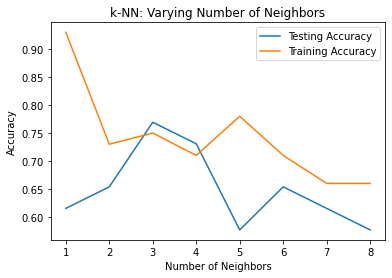

In [7]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
dt_cv = np.empty(len(neighbors))

# Farklı k değerleri denemek için for loop
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    

# Plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# #2 Random State

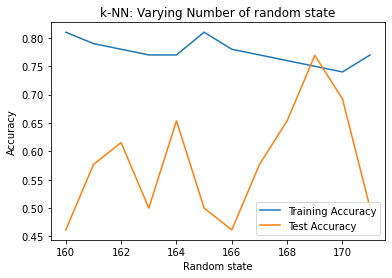

In [8]:
neighbors = np.arange(160, 172)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
dt_cv = np.empty(len(neighbors))

# Farklı k değerleri denemek için for loop
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=k,stratify=y)
    knn = KNeighborsClassifier(n_neighbors=3)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Plot
plt.title('k-NN: Varying Number of random state')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.xlabel('Random state')
plt.ylabel('Accuracy')
plt.show()

# #3 Test Size

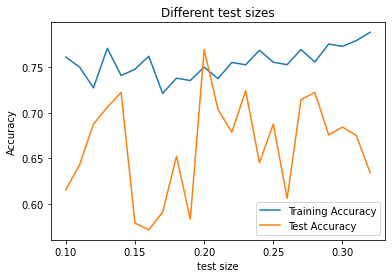

In [9]:
neighbors = np.arange(0.1,0.33,0.01)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
dt_cv = np.empty(len(neighbors))

# Farklı k değerleri denemek için for loop
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=k,random_state=169,stratify=y)
    
    knn = KNeighborsClassifier(n_neighbors=3)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Plot
plt.title('Different test sizes')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.xlabel('test size')
plt.ylabel('Accuracy')
plt.show()